In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from colormap import cmap_builder
from matplotlib.collections import PatchCollection

from sklearn.mixture import GaussianMixture
from scipy.stats import spearmanr as scor
from sklearn.metrics import silhouette_score

from other_functions import *
sns.set_style('whitegrid')
%matplotlib inline

## Figure 1 and associated Supplementary Figures

Mean: [[ 0.99274416]
 [ 0.50973205]]
SD: [[[ 0.09944125]]

 [[ 0.28744076]]]


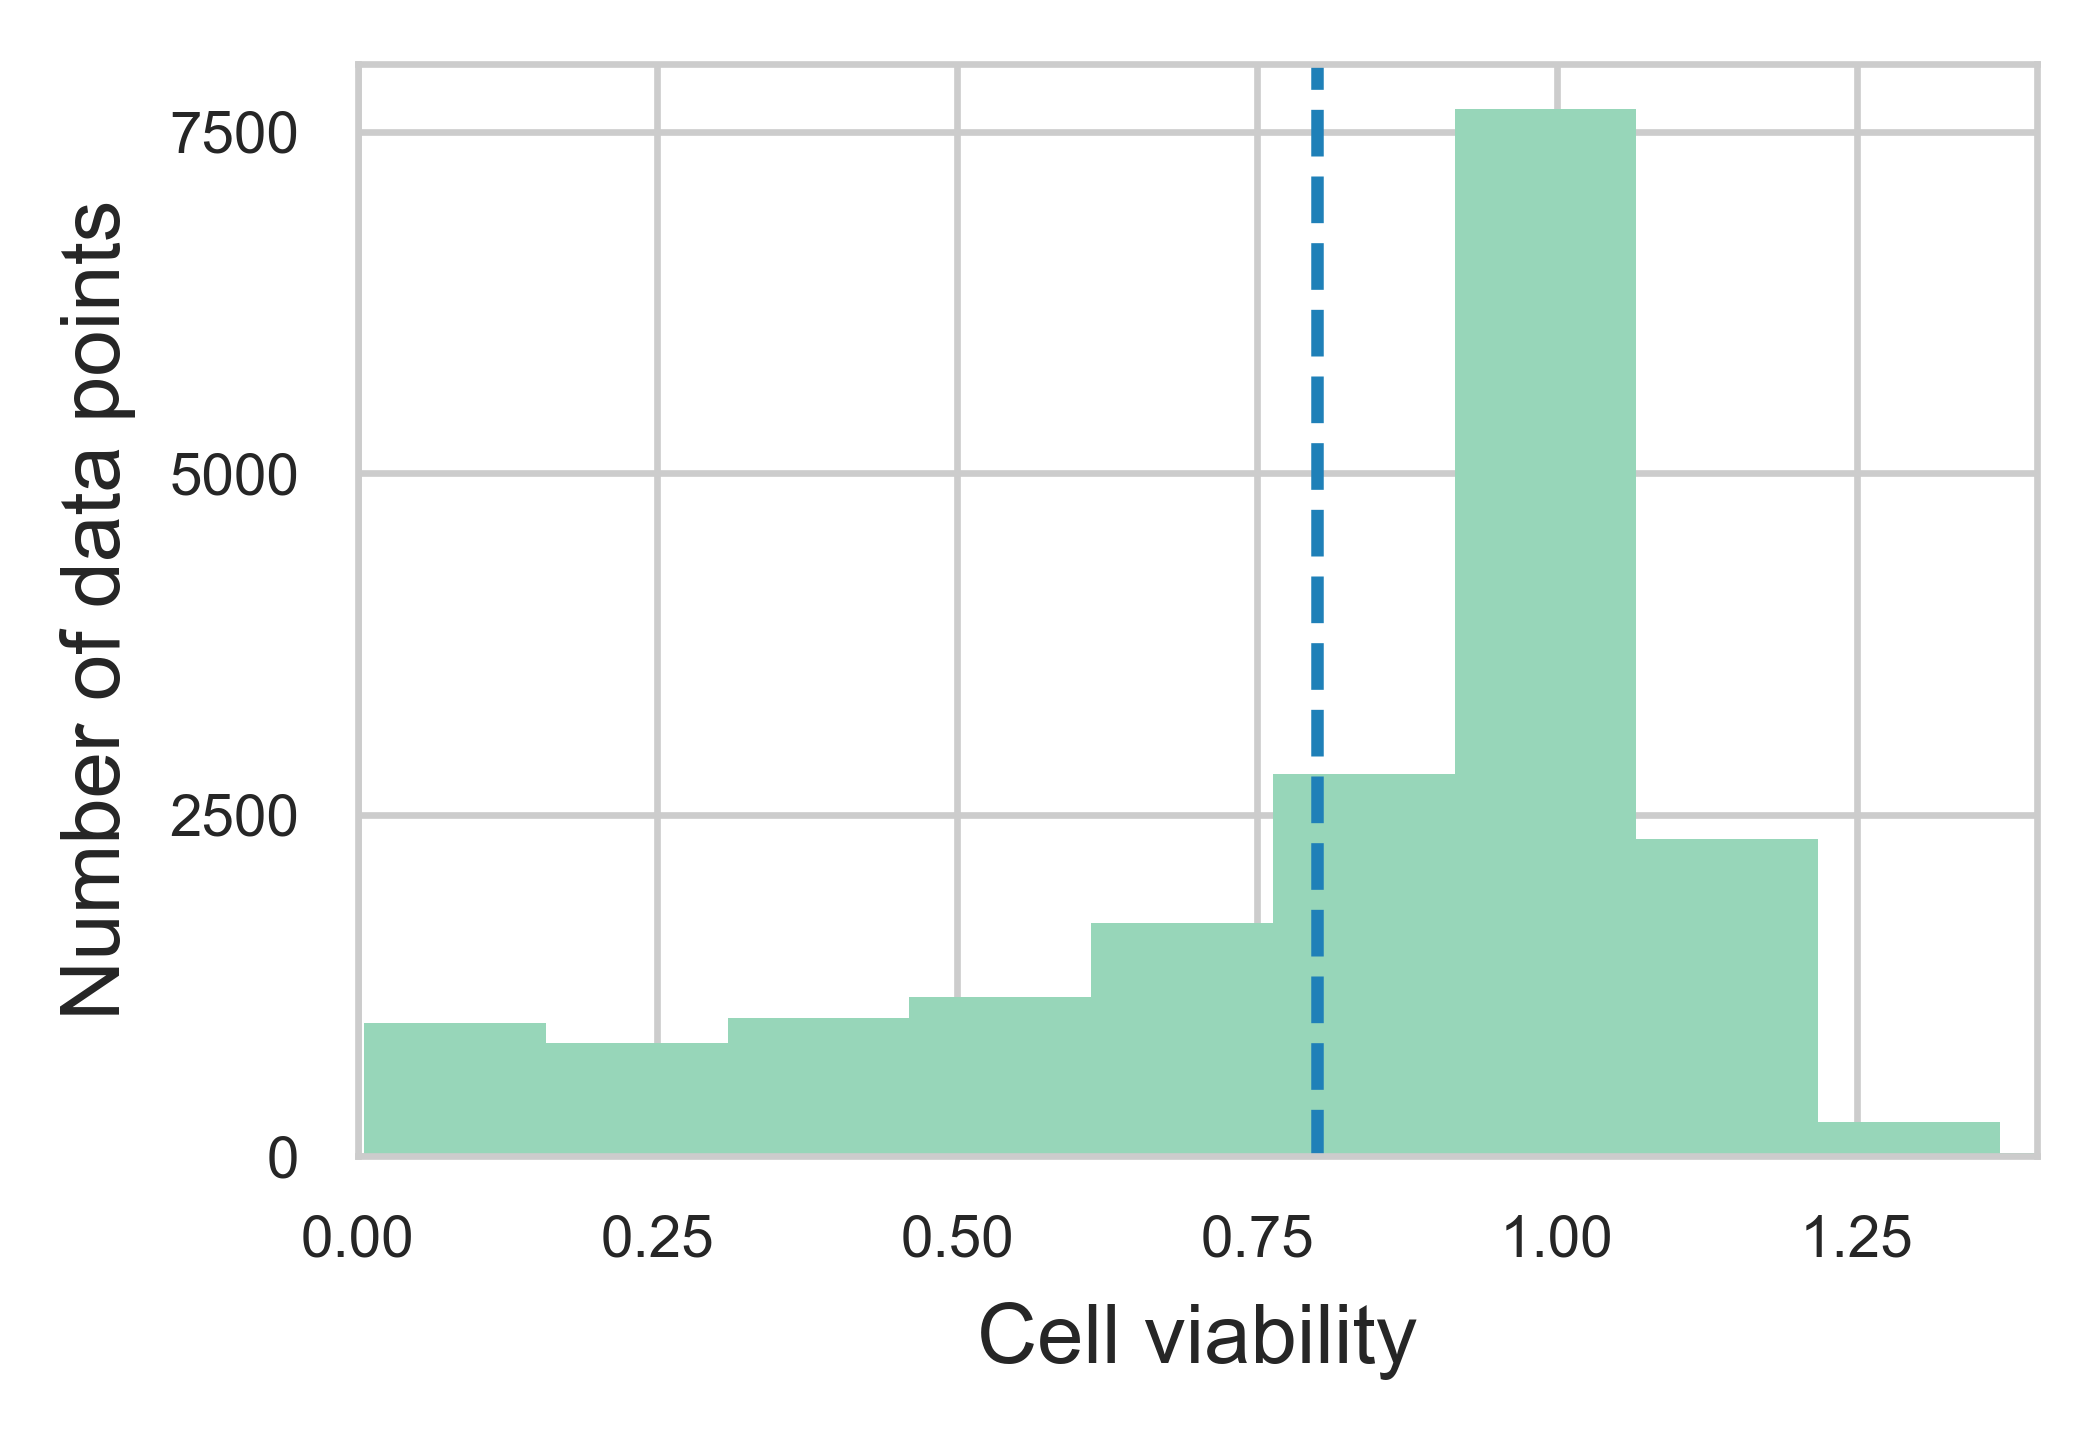

In [3]:
#SFig1D
plt.figure(dpi=600,figsize=(3.6,2.4))
sns.set_palette('YlGnBu',2)
data=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                  sep=',',header=0,index_col=[0])
plt.hist(data['cpd_avg_pv'],linewidth=0)
plt.plot([0.8,0.8],[0.0,8000],'--')
plt.xticks(np.arange(0,1.5,0.25),size=7)
plt.yticks(np.arange(0,8000,2500),size=7)
plt.xlabel('Cell viability',size=10)
plt.ylabel('Number of data points',size=10)
plt.xlim(0,1.4)
plt.ylim(0,8000)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1D.pdf')
#fitting two gaussians
model=GaussianMixture(2)
model.fit(data['cpd_avg_pv'].values.reshape((-1,1)))
print('Mean:',model.means_)
print('SD:',np.sqrt(model.covariances_))

In [4]:
sig_data=pd.read_table('../results/model/dimension_reduction/pca.csv',
                       sep=',',header=0,index_col=[0])
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                       sep=',',header=0,index_col=[0])
sig_info['bin_viability']='Cell viability<=0.8'
fil=sig_info['cpd_avg_pv']>0.8
sig_info.loc[sig_info.index[fil],'bin_viability']='Cell viability>0.8'

Spearman Rho with X: SpearmanrResult(correlation=-0.27815320239408109, pvalue=0.0)
Spearman Rho with Y: SpearmanrResult(correlation=-0.17933387221611252, pvalue=2.787893031404833e-135)


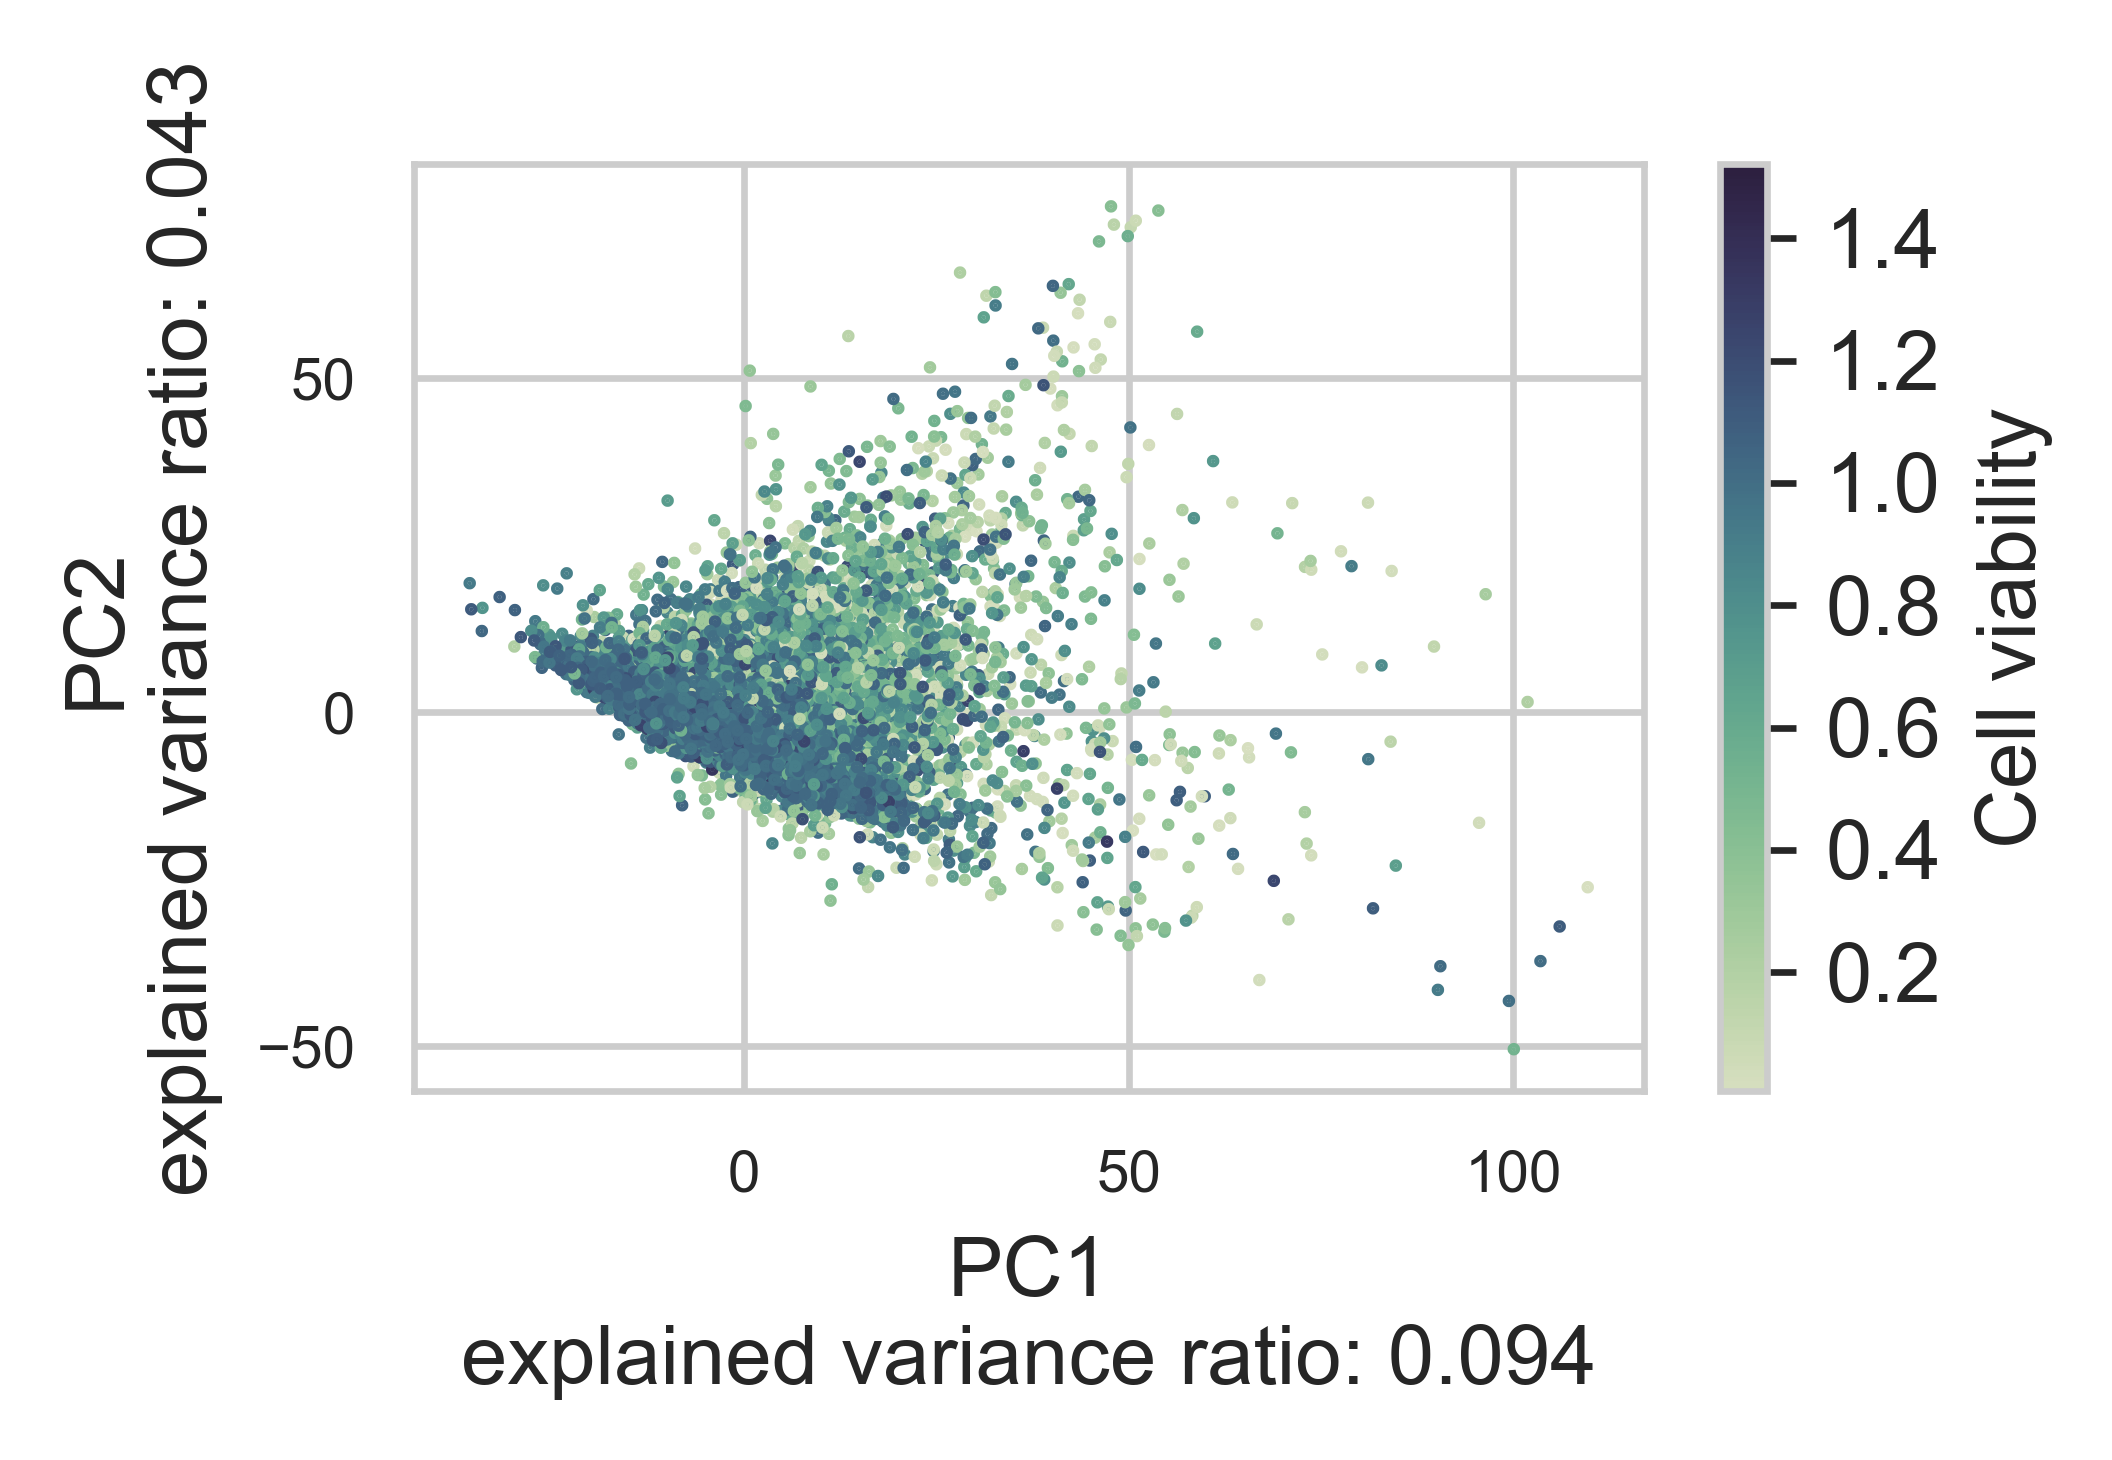

In [5]:
make_dim_reduc_plot(sig_data,sig_info,fname='Fig1B')

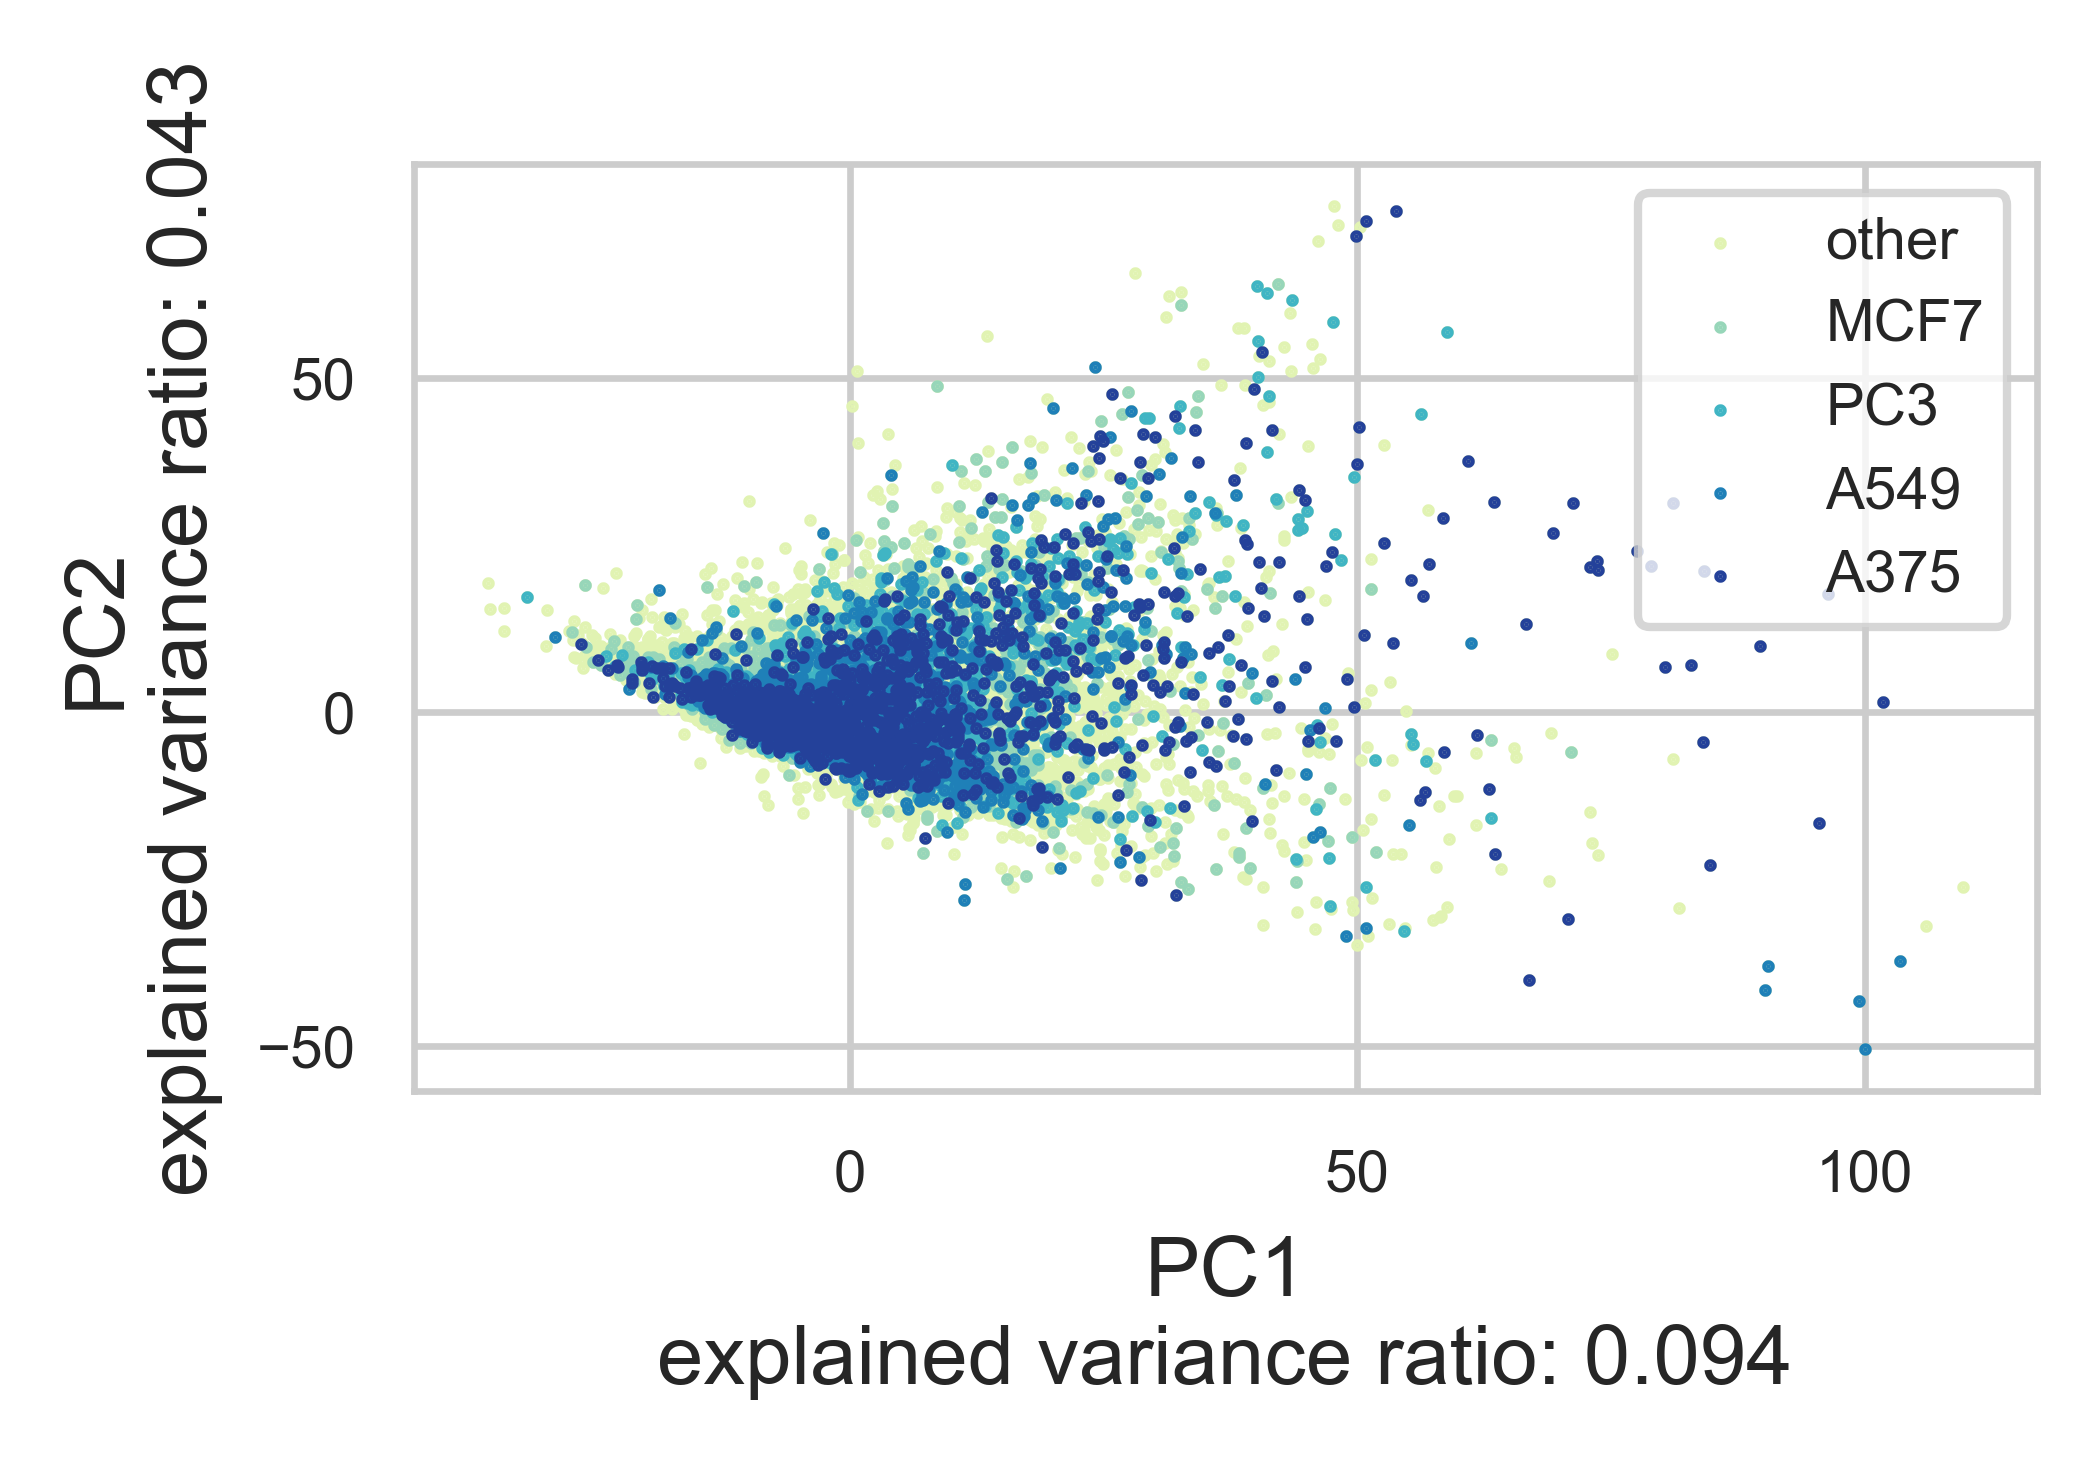

In [6]:
make_dim_reduc_plot(sig_data,sig_info,'cell_id','SFig1A')

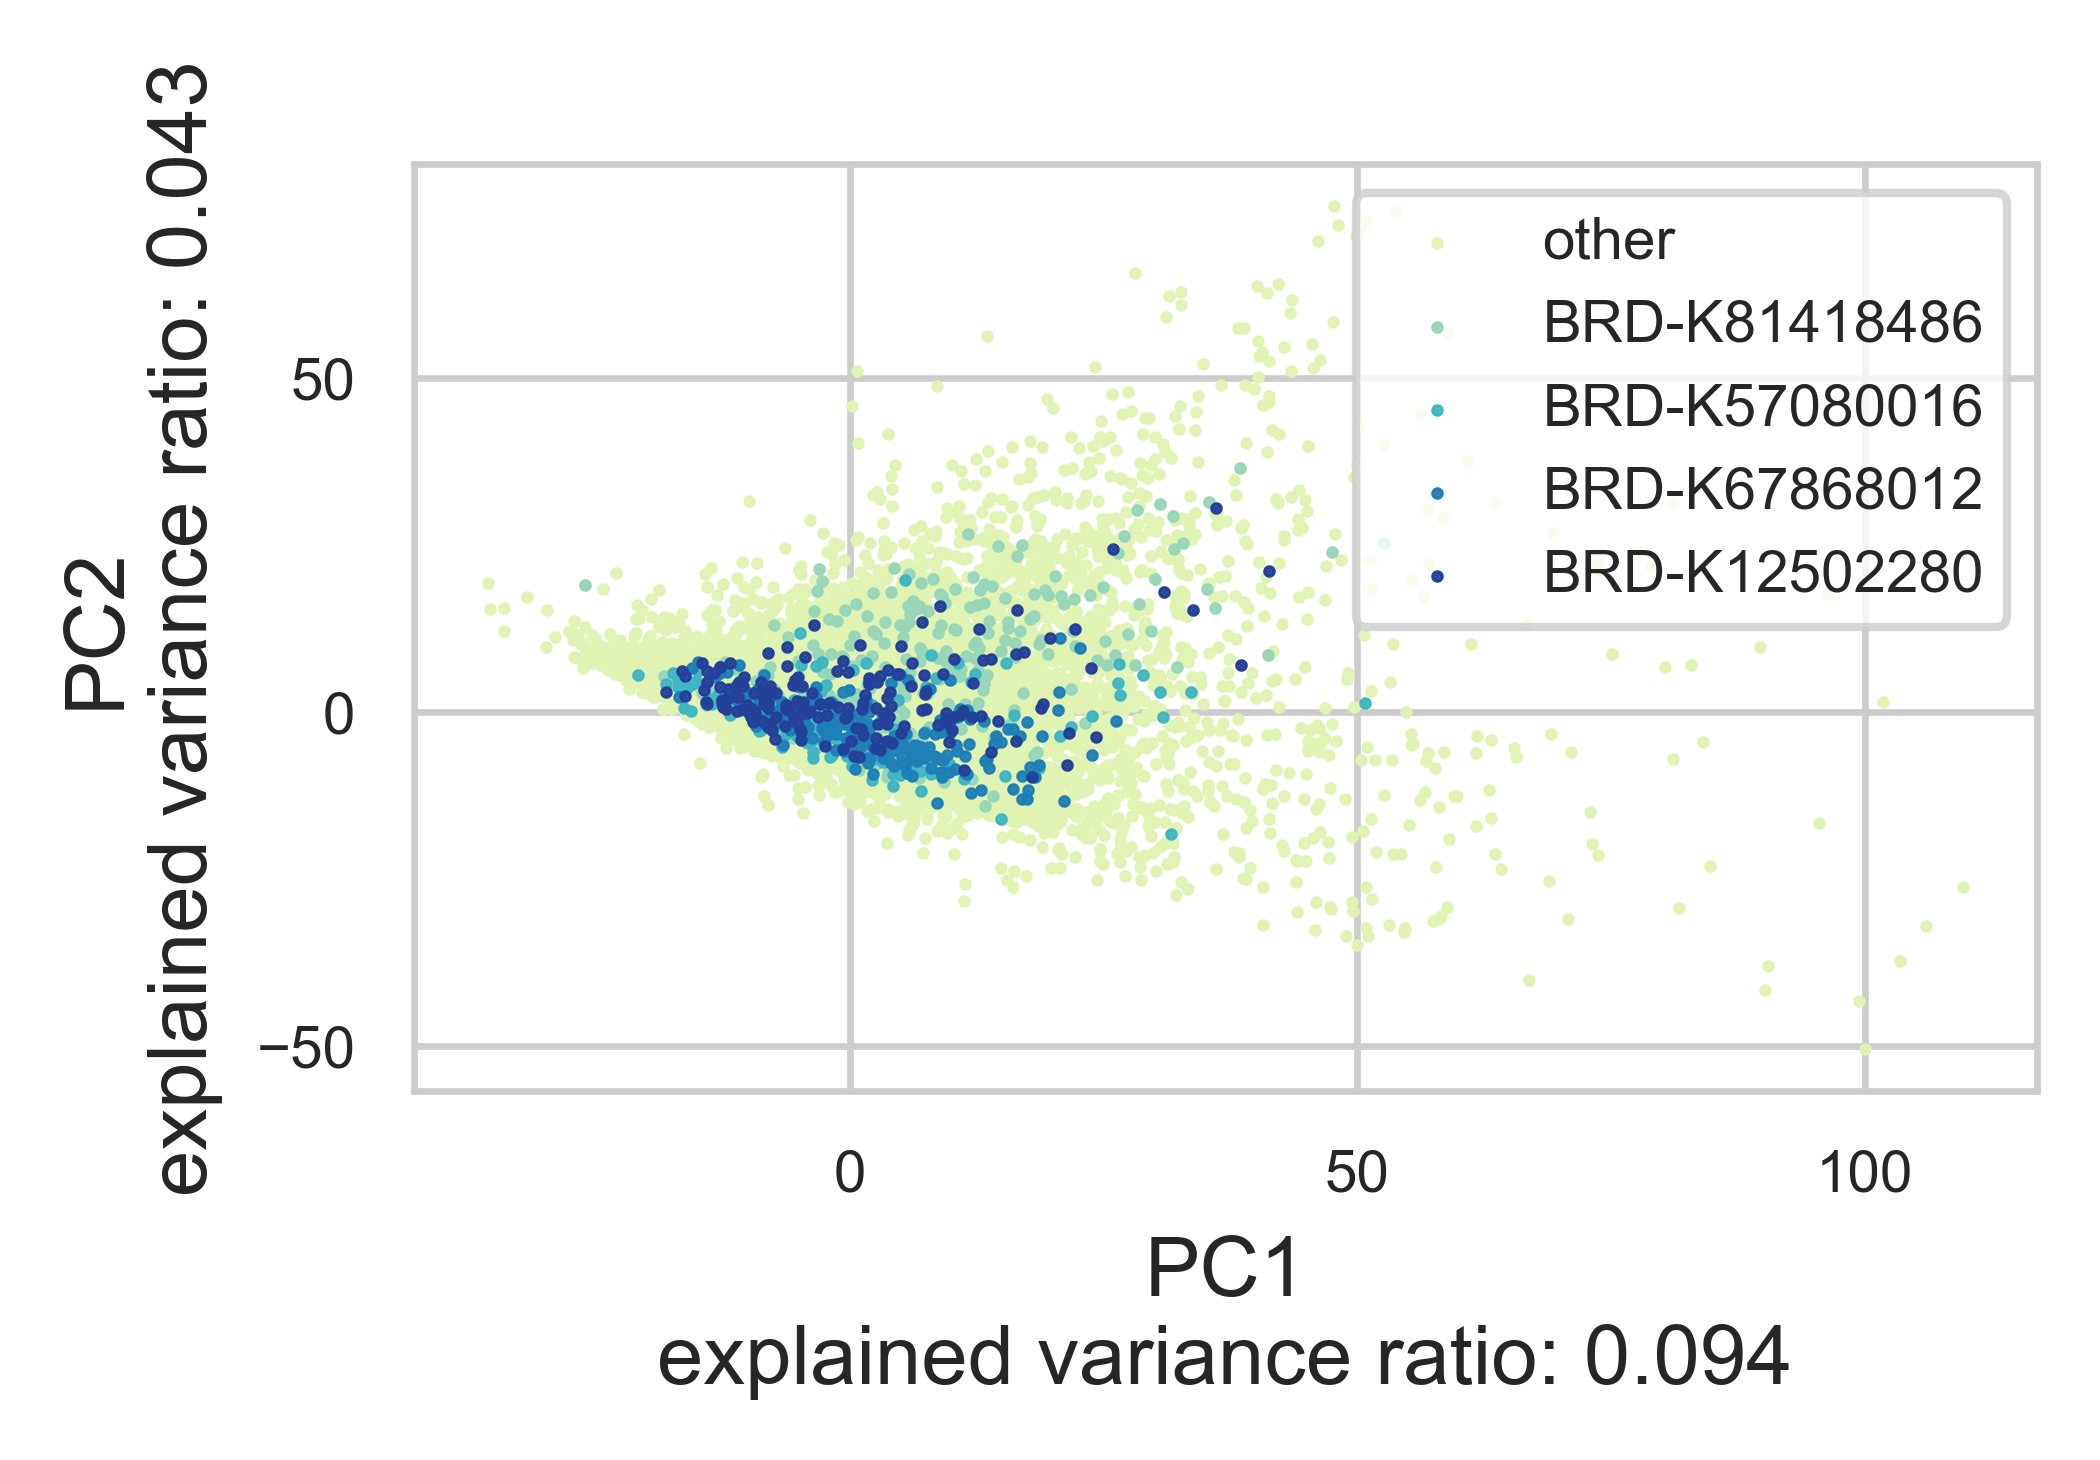

In [7]:
make_dim_reduc_plot(sig_data,sig_info,'pert_id','SFig1B')

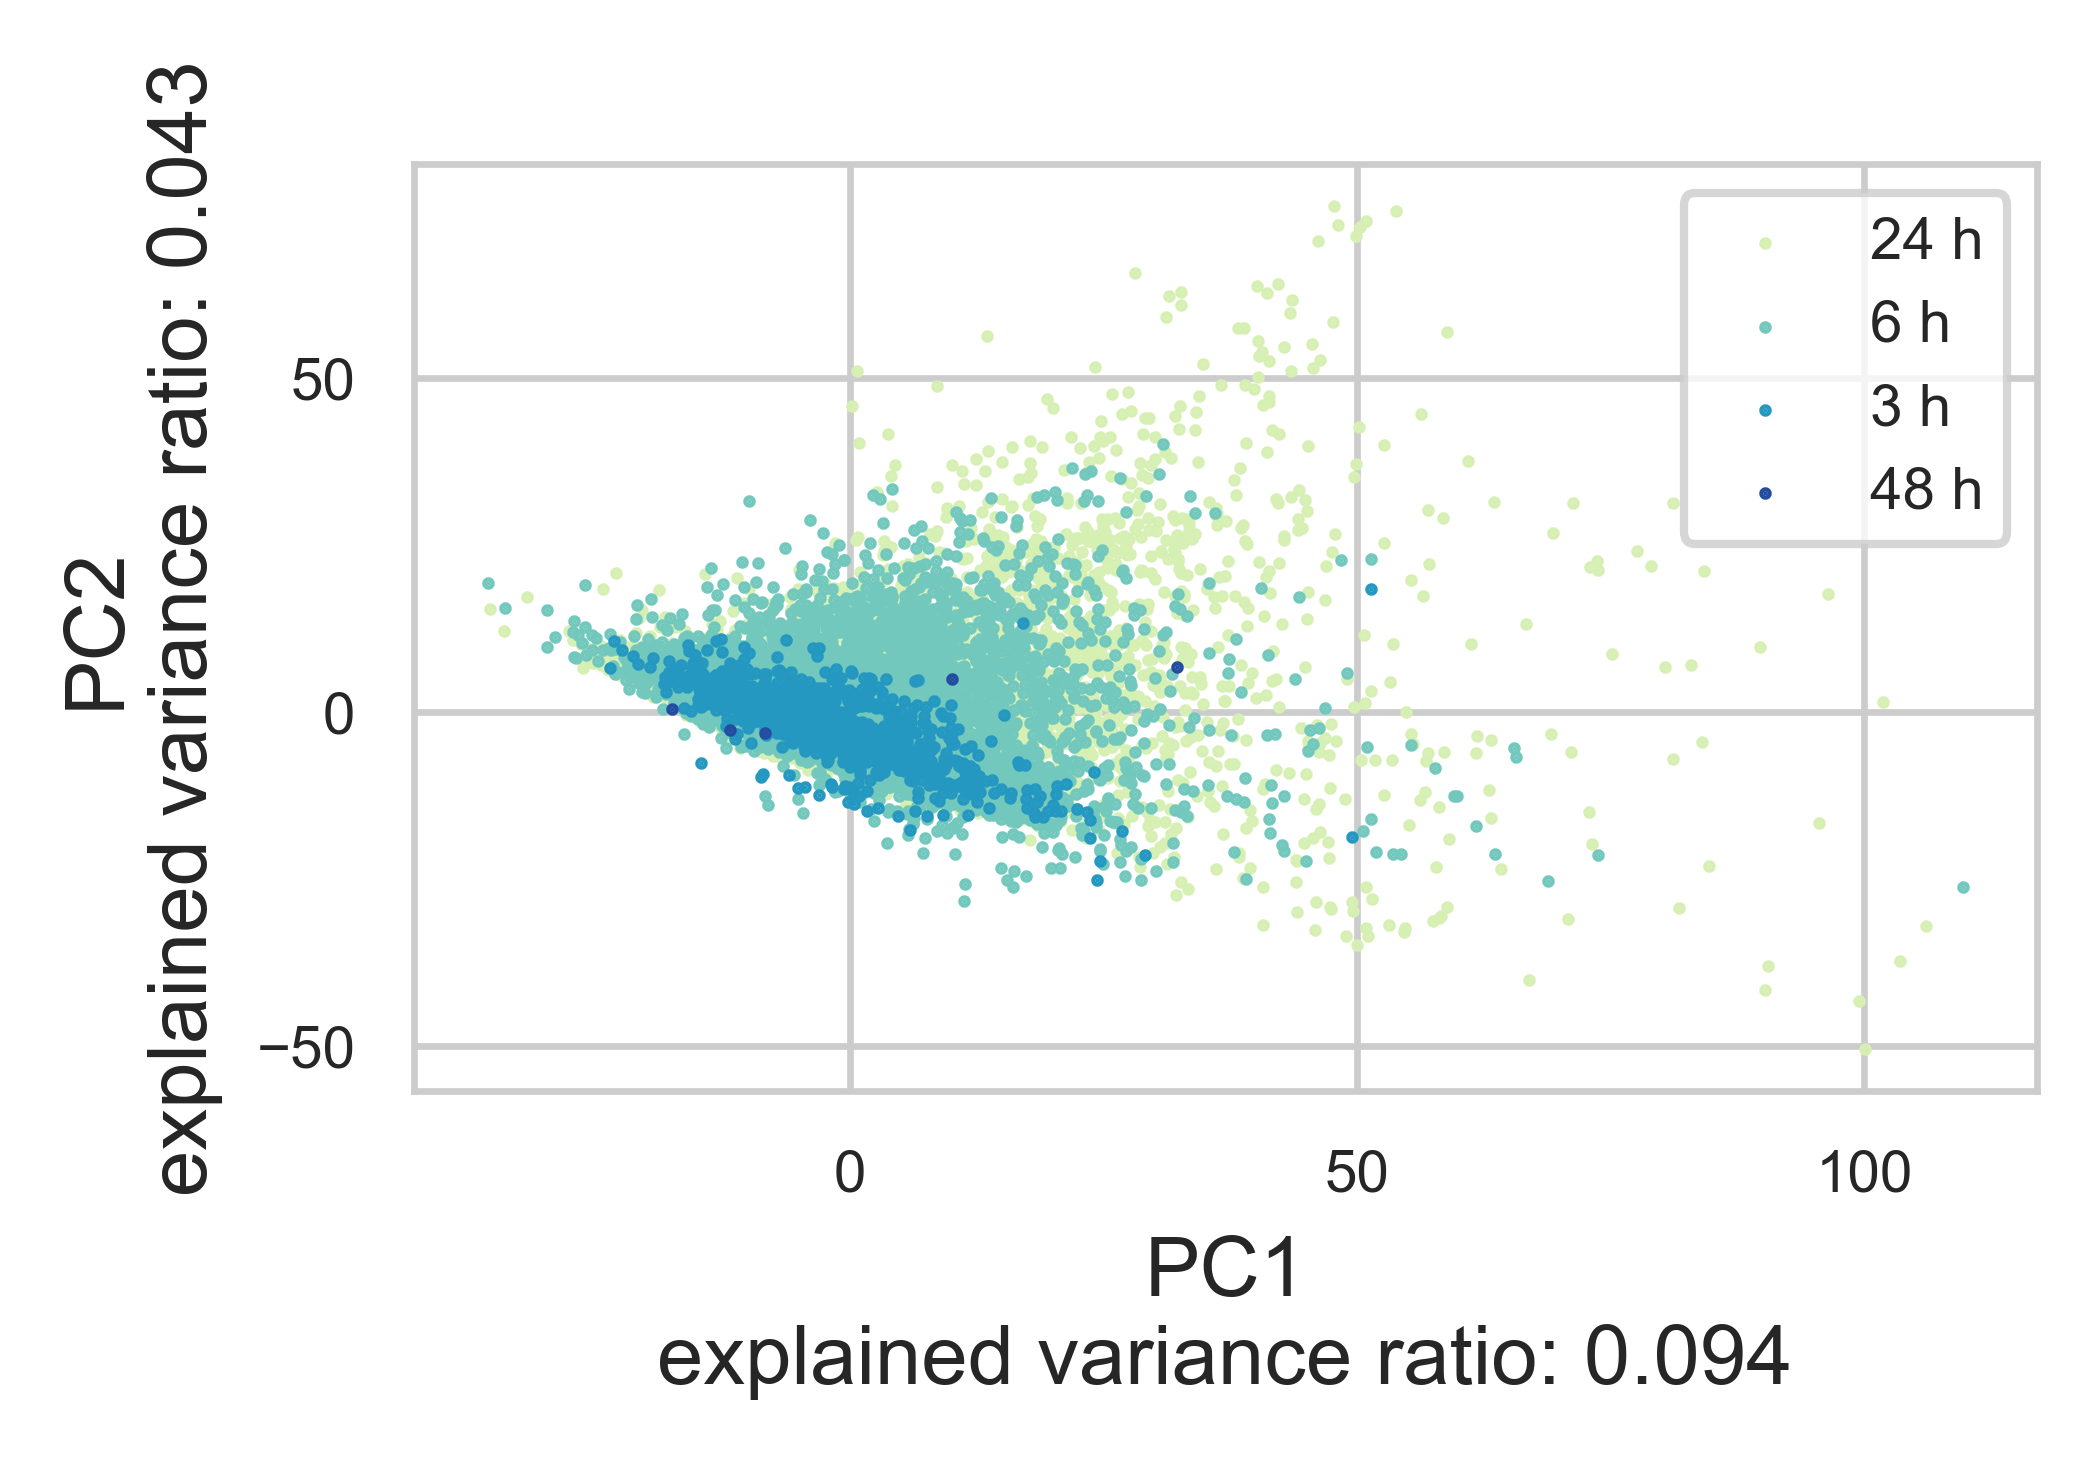

In [8]:
make_dim_reduc_plot(sig_data,sig_info,'pert_itime','SFig1C')

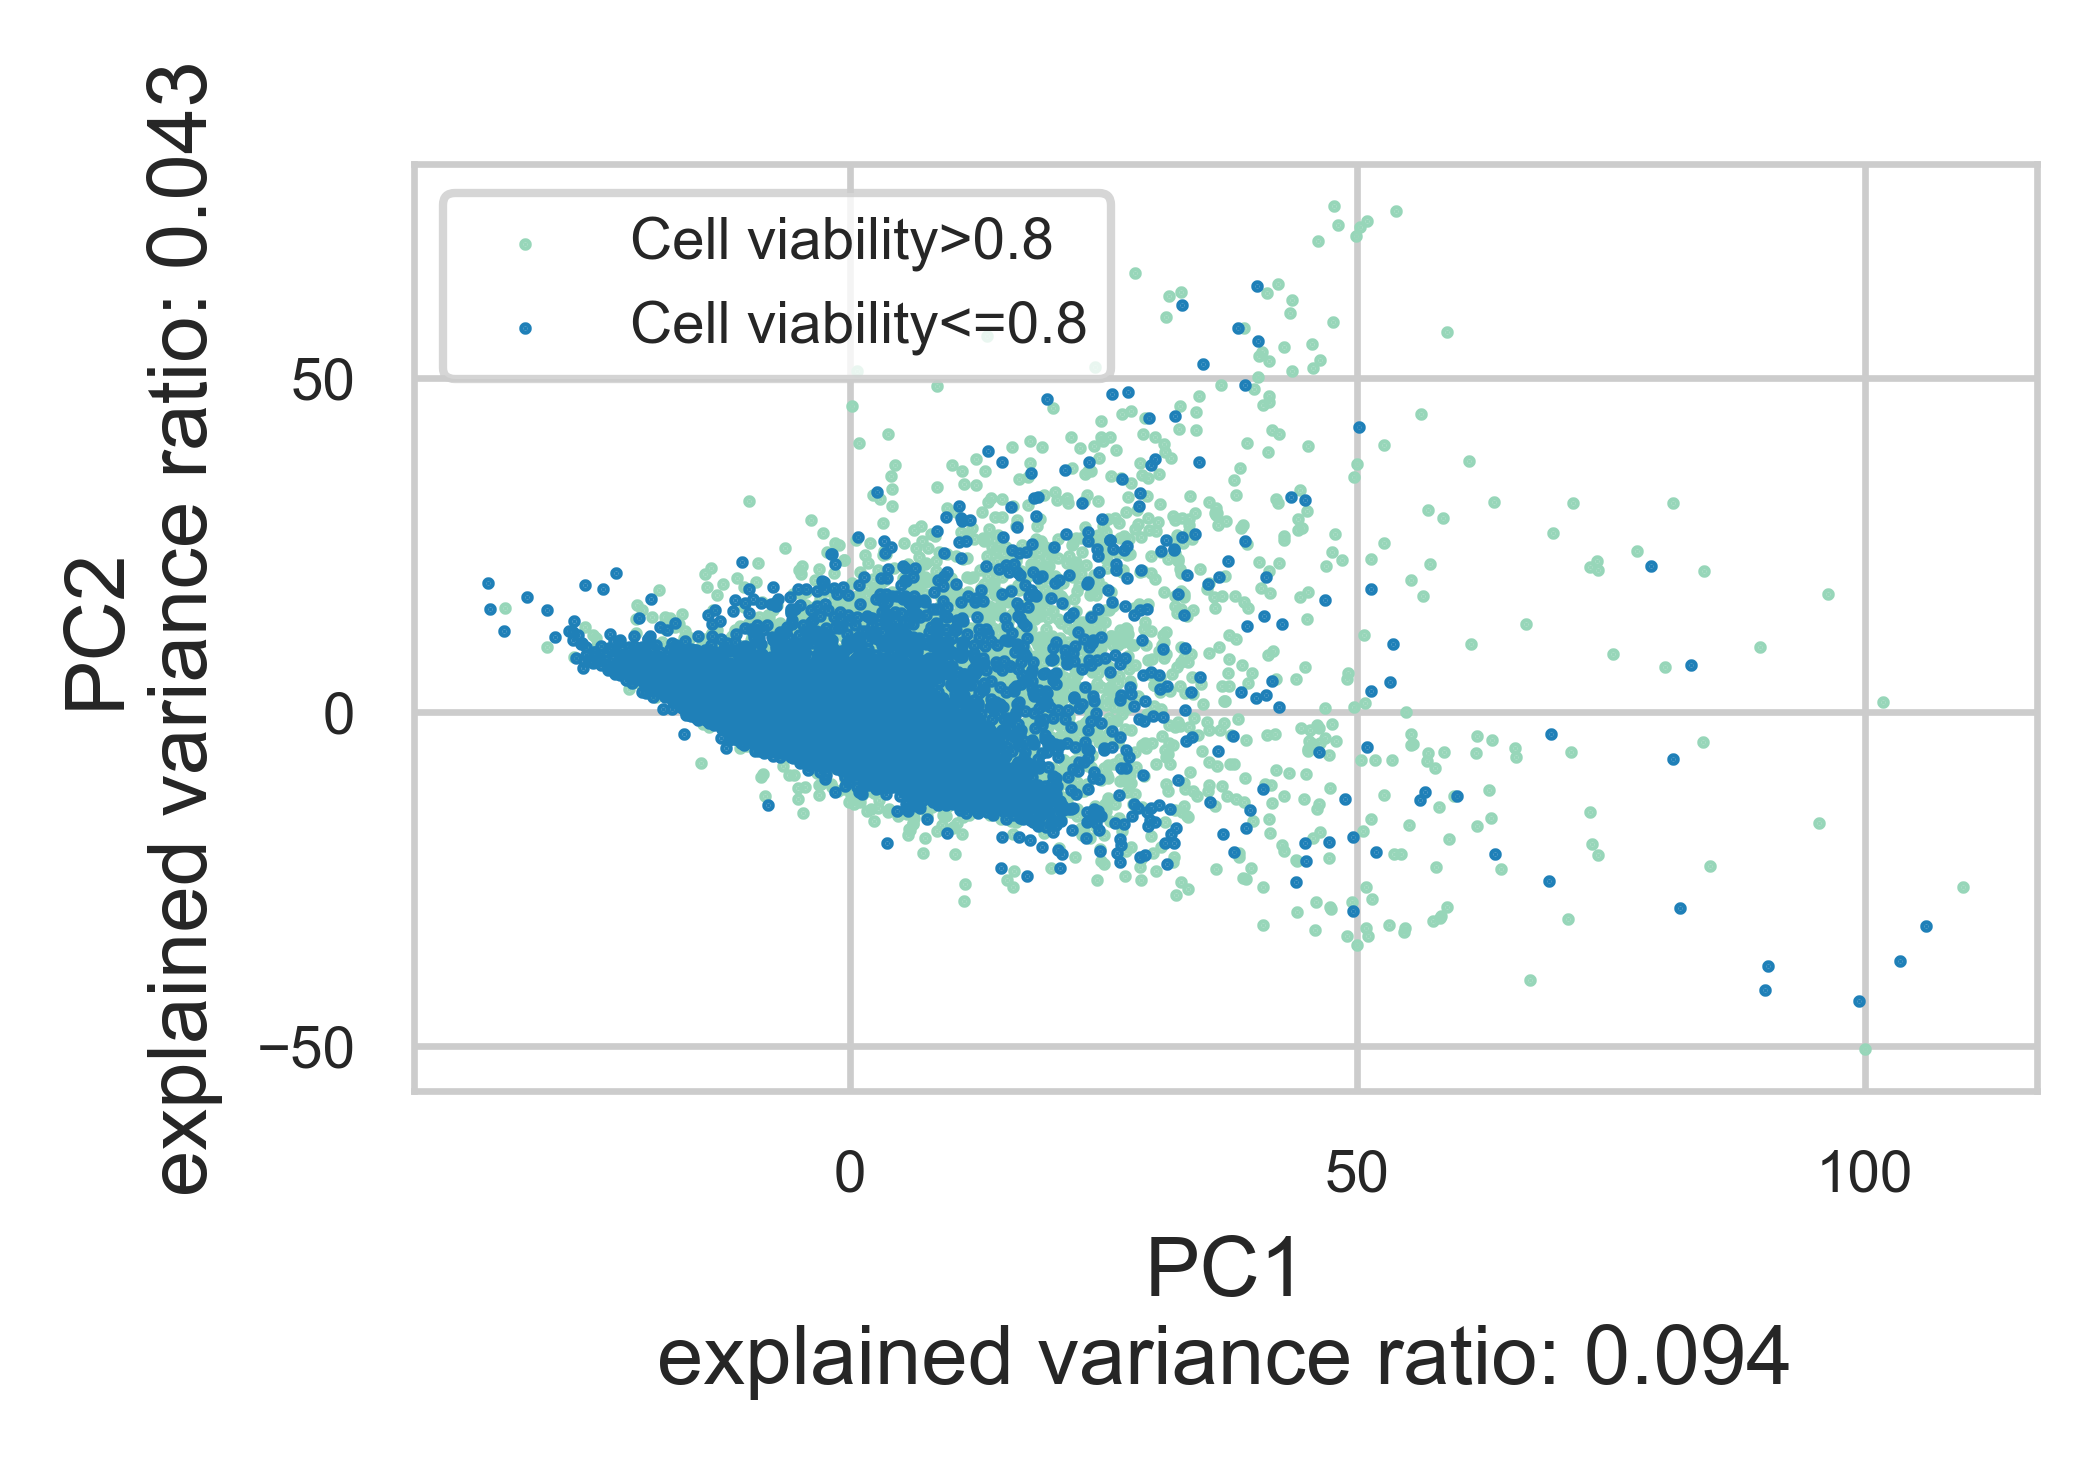

In [9]:
make_dim_reduc_plot(sig_data,sig_info,'bin_viability','SFig1E')

In [10]:
#silhouette analysis based on the previus clusterings, SFig 1F
sig_clustering=sig_info.loc[:,['pert_id','cell_id','bin_viability','pert_itime']].copy()
sig_clustering['PC1']=sig_data.iloc[:,0]
sig_clustering['PC2']=sig_data.iloc[:,1]
sns.set_palette('YlGnBu',4)
clustering_results=pd.DataFrame(index=range(4),columns=['Clustering',
                                                        'Clustering\nbased on','Average silhouette'])
clustering_results.loc[0,:]=['Compound','Compound',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['pert_id'])]
clustering_results.loc[1,:]=['Cell line','Cell line',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['cell_id'])]
clustering_results.loc[2,:]=['Time','Time',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['pert_itime'])]
clustering_results.loc[3,:]=['Cell viability','Cell viability',
                             silhouette_score(sig_clustering.loc[:,['PC1','PC2']],sig_clustering['bin_viability'])]

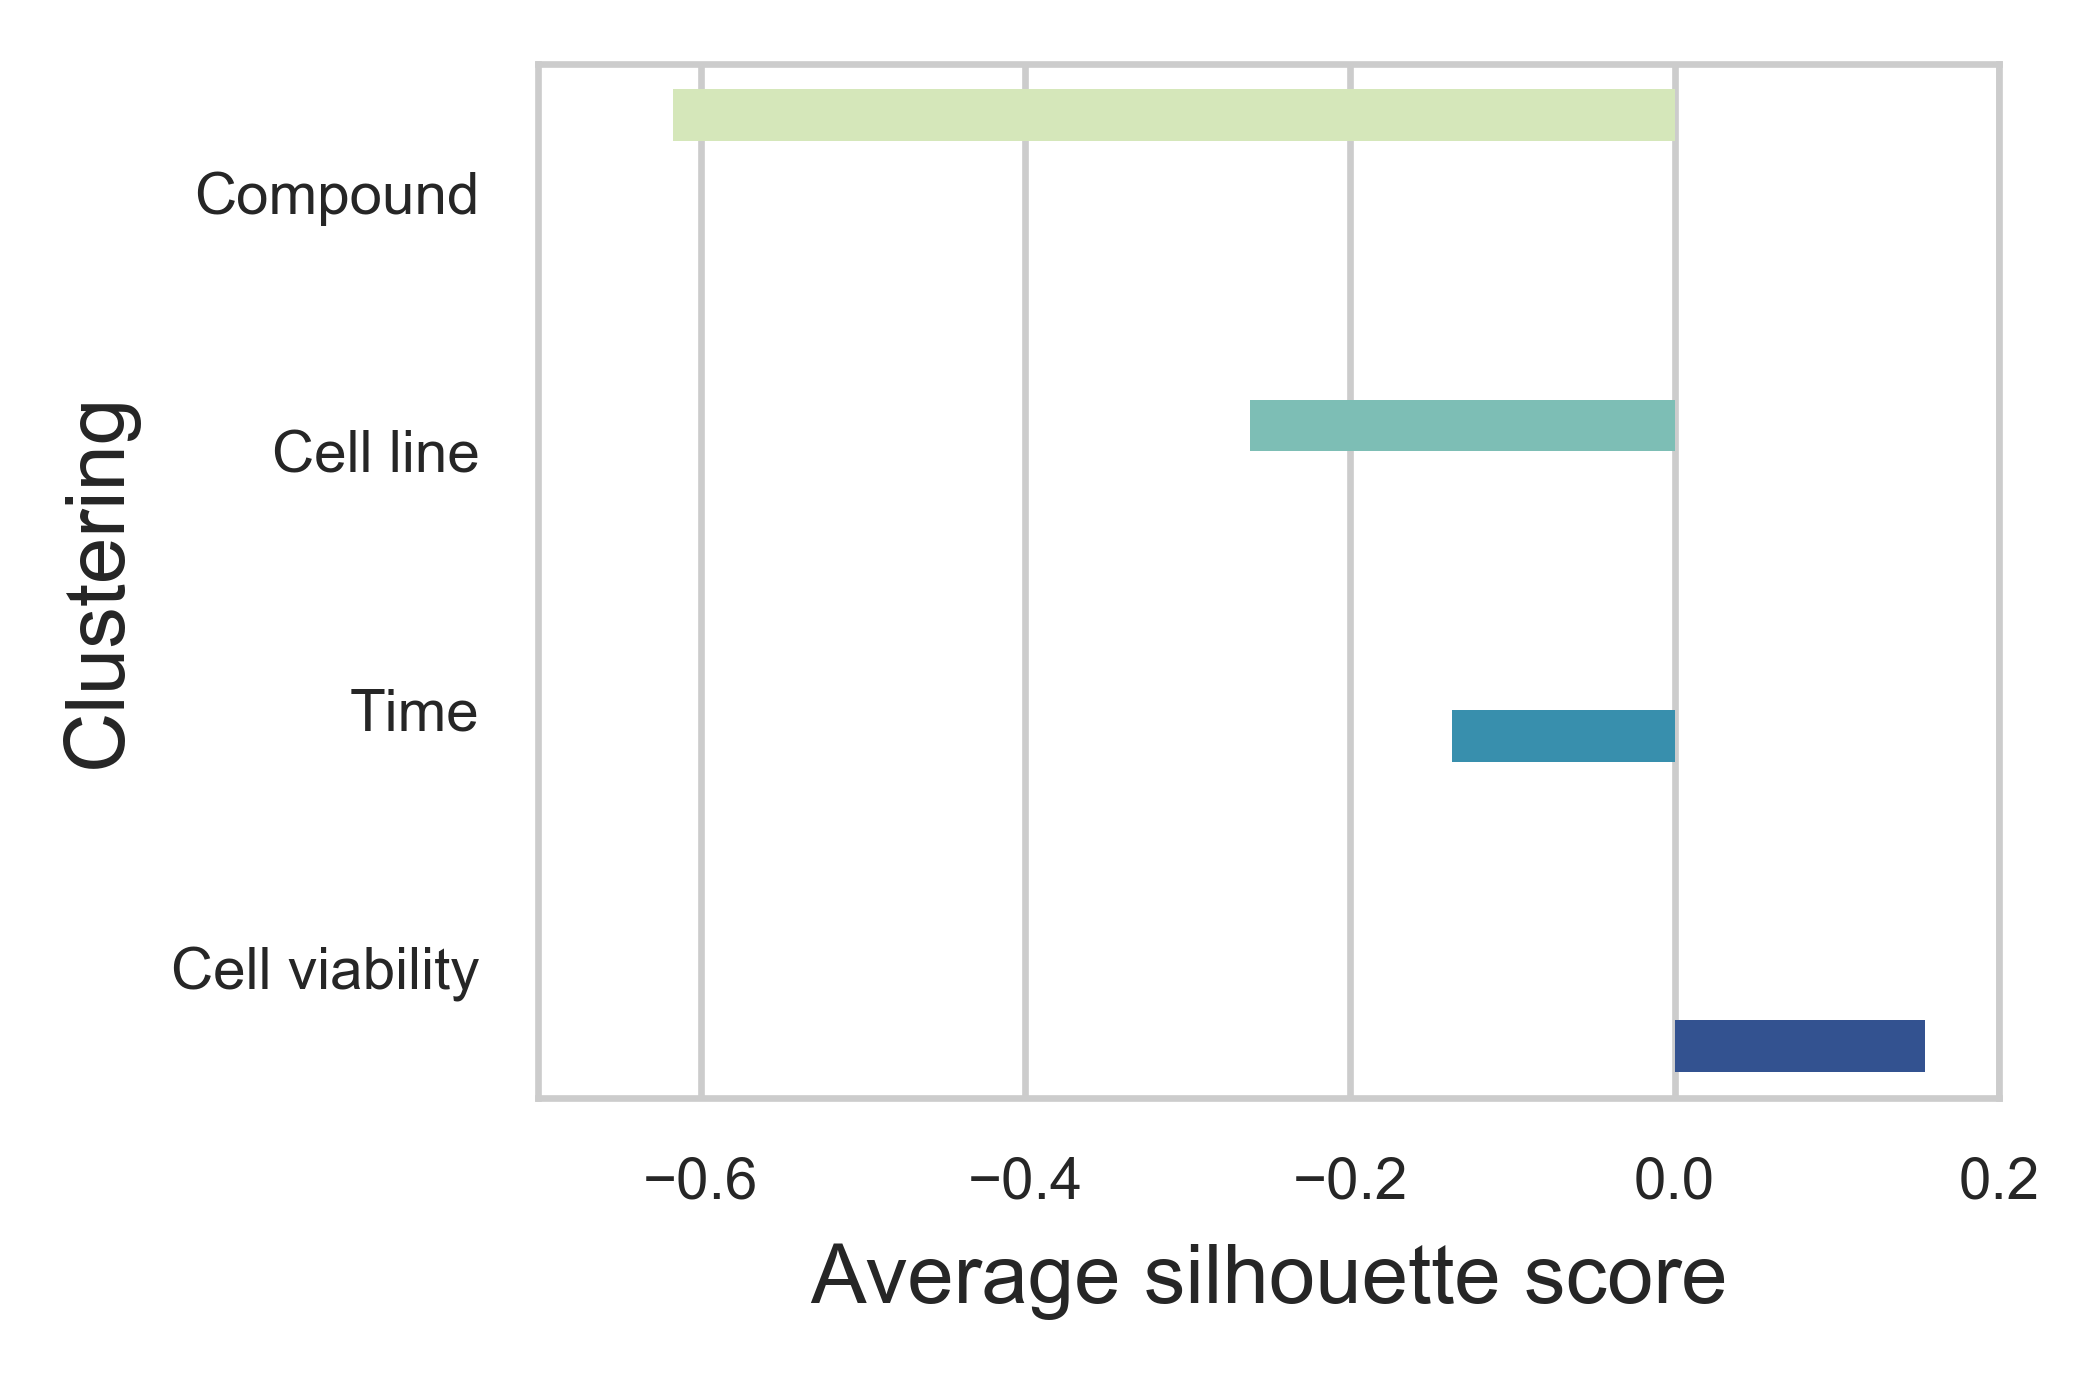

In [13]:
plt.figure(dpi=600,figsize=(3.6,2.4))
sns.barplot(x='Average silhouette',y='Clustering',hue='Clustering\nbased on',
            data=clustering_results,linewidth=0)
plt.legend([],frameon=False)
plt.xlim(-0.7,0.2)
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Average silhouette score',size=10)
plt.ylabel('Clustering',size=10)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1F.pdf')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


CTRP-L1000 CTRP-L1000 0.595488469567 -inf
CTRP-L1000 Achilles-L1000 0.191925619497 -inf
Achilles-L1000 CTRP-L1000 0.336333355296 -246.073476646
Achilles-L1000 Achilles-L1000 0.497307285658 -inf


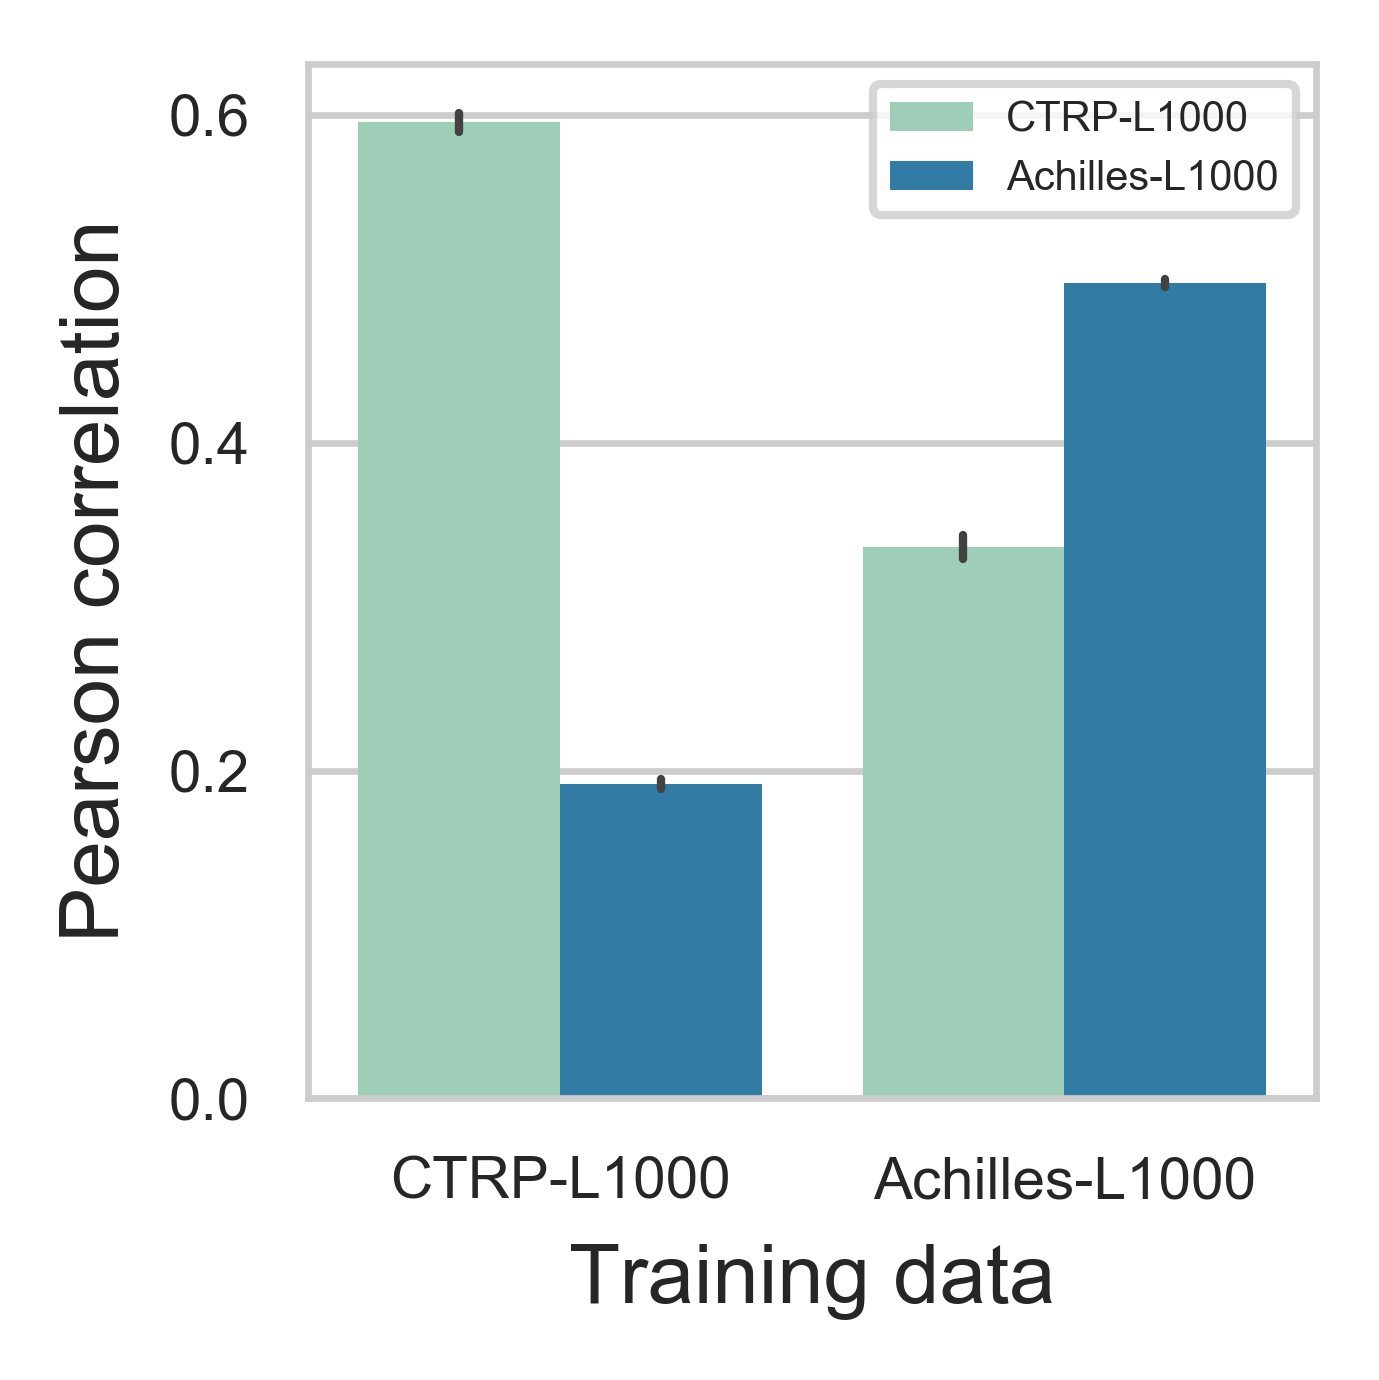

In [19]:
#Figure 1C prediction performance
plt.figure(dpi=600,figsize=(2.4,2.4))
sns.set_palette('YlGnBu',2)
data=pd.read_table('../results/model/cv/achilles_ctrp_all_prediction.csv',
                   sep=',',header=0,index_col=[0])
data.columns=['Training data','Test data','Pearson correlation','p','s']
data['Training data']+='-L1000'
data['Test data']+='-L1000'
sns.barplot(x='Training data',y='Pearson correlation',hue='Test data',
            data=data,errwidth=1,ci='sd',linewidth=0)
plt.xticks(size=7)
plt.yticks(size=7)
plt.xlabel('Training data',size=10)
plt.ylabel('Pearson correlation',size=10)
plt.legend(fontsize=5)
plt.tight_layout()
plt.savefig('../figures/raw/Fig1C.pdf')
for tr in list(set(data['Training data'])):
    for cv in list(set(data['Test data'])):
        fil=(data['Training data']==tr) & (data['Test data']==cv)
        print(tr,cv, np.mean(data[fil]['Pearson correlation']), np.mean(np.log10(data[fil]['p'])))


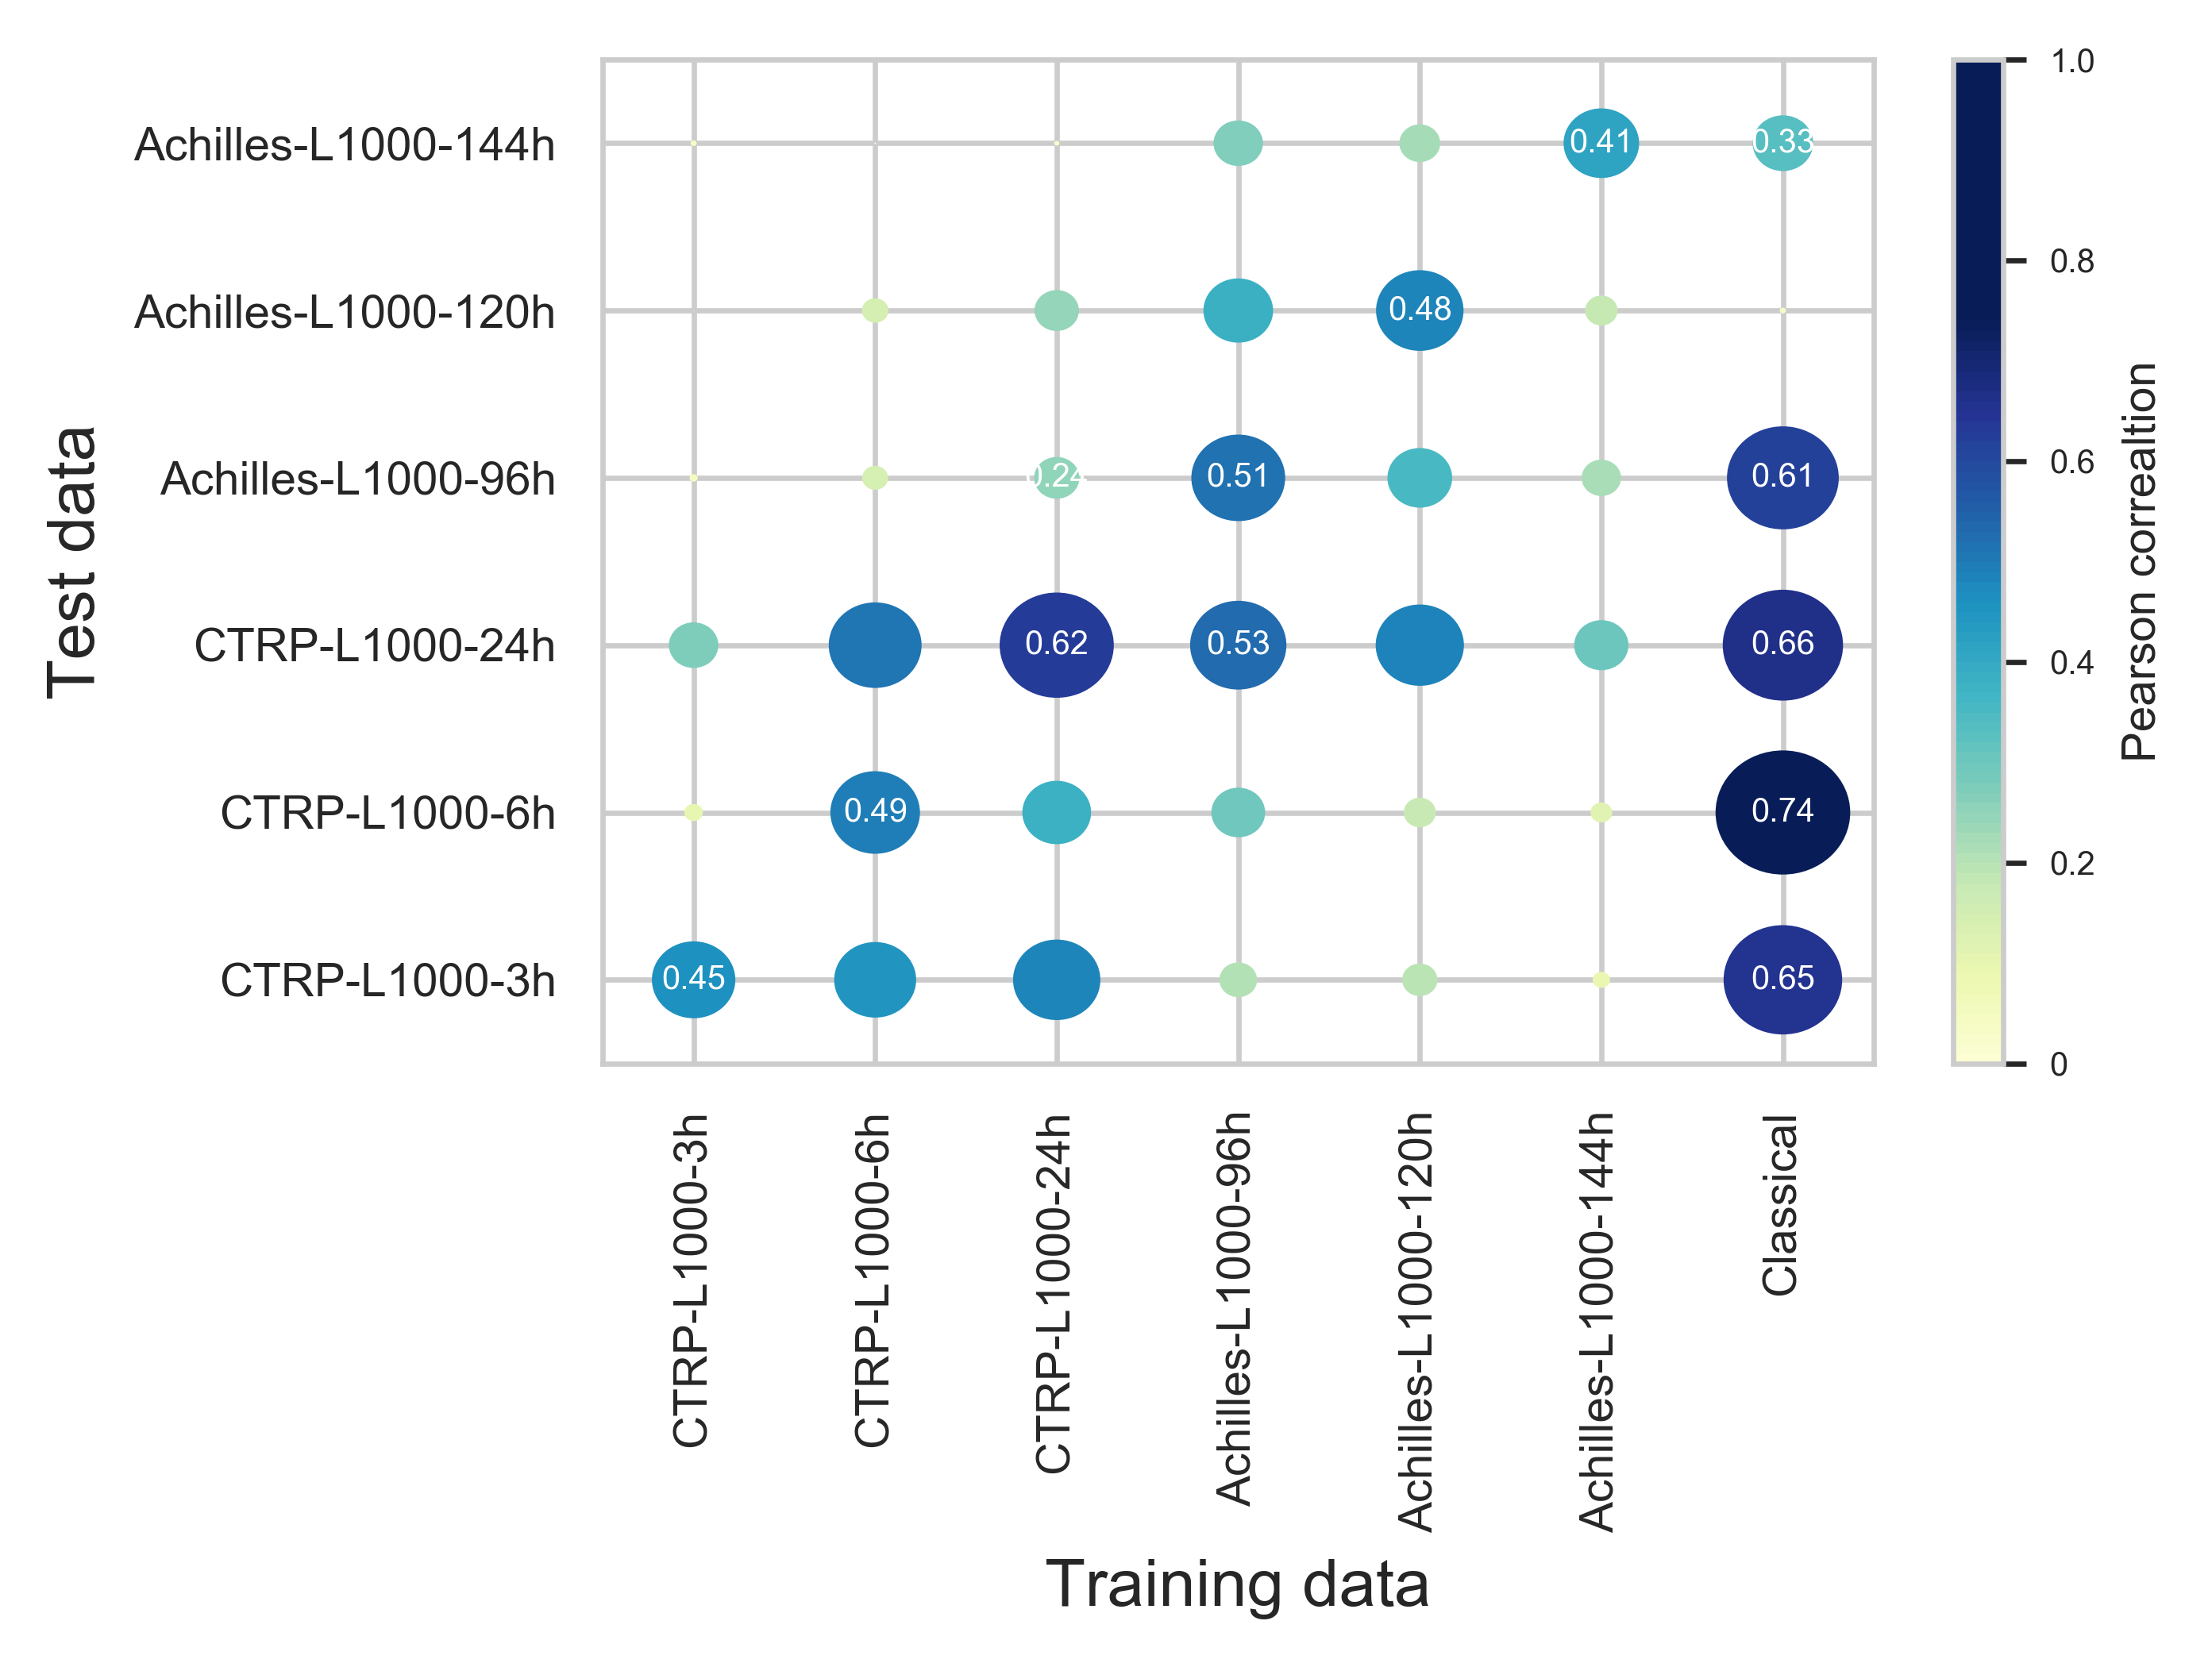

In [22]:
#Figure 1D prediction performance (the plot is a bit complicated...)
sns.set_style("whitegrid")
data_sig=pd.read_table('../results/model/cv/achilles_ctrp_time_prediction.csv',
                       sep=',',header=0,index_col=[0])
data_bl=pd.read_table('../results/model/cv/achilles_ctrp_classical_prediction.csv',
                      sep=',',header=0,index_col=[0])
data=pd.DataFrame(0,index=['CTRP-L1000-3h','CTRP-L1000-6h','CTRP-L1000-24h',
                           'Achilles-L1000-96h','Achilles-L1000-120h',
                           'Achilles-L1000-144h','Classical'],
                  columns=['CTRP-L1000-3h','CTRP-L1000-6h','CTRP-L1000-24h',
                           'Achilles-L1000-96h','Achilles-L1000-120h','Achilles-L1000-144h']).T
for i in data.index:
    d1,dummy,t1=i.split('-')
    t1=t1[:-1]+' h'
    for j in data.index:
        d2,dummy,t2=j.split('-')
        t2=t2[:-1]+' h'
        fil=(data_sig['Train data']==d1)&(data_sig['CV data']==d2)&(data_sig['Train time']==t1)&(data_sig['CV time']==t2)
        data.loc[j,i]=np.mean(data_sig['r'][fil])
for i in data.index:
    d1,dummy,t1=i.split('-')
    t1=t1[:-1]+' h'
    fil=(data_bl['Train data']==d1)&(data_bl['Train time']==t1)
    data.loc[i,'Classical']=np.mean(data_bl['r'][fil])
fig,ax=plt.subplots(figsize=(4.8,3.6))
fig.set_dpi(600)
ax.set_xlim(-0.1,1.3)
ax.set_ylim(-0.1,1.1)
cmap=cmap_builder('YlGnBu')
circles=[]
colors=[]
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        circles.append(plt.Circle((j*0.2,i*0.2),np.abs(data.iloc[i,j])*0.1))
        colors.append((data.iloc[i,j]+1)/2)
p=PatchCollection(circles,array=np.array(colors),cmap=cmap,linewidth=0)
ax.add_collection(p)
for i in range(data.shape[0]):
    ax.text(i*0.2,i*0.2,str(data.iloc[i,i])[:4],color='white',va='center',ha='center',size=5)
    if data.iloc[i,-1]>0.2:
        ax.text(1.2,i*0.2,str(data.iloc[i,-1])[:4],color='white',va='center',ha='center',size=5)
for i,j in [(3,2),(2,3)]:
    ax.text(j*0.2,i*0.2,str(data.iloc[i,j])[:4],color='white',va='center',ha='center',size=5)
ax.set_xticks(np.arange(0.0,1.3,0.2))
ax.set_yticks(np.arange(0.0,1.1,0.2))
ax.set_xticklabels(data.columns,rotation=90,size=7)
ax.set_yticklabels(data.index,size=7)
ax.set_xlabel('Training data',size=10)
ax.set_ylabel('Test data',size=10)

cb=fig.colorbar(p,boundaries= np.linspace(0.5,1,101),ticks=[0.5,0.6,0.7,0.8,0.9,1.0])
cb.ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0],size=5)
cb.set_label('Pearson correaltion',size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig1D.pdf')

## Figure 1 and associated Supplementary Figures

In [12]:
sig_info=pd.read_table('../results/Achilles/sig_info_merged_lm.csv',
                      sep=',',header=0,index_col=[0])
signatures=pd.read_table('../results/Achilles/signatures_merged_lm.csv',
                        sep=',',header=0,index_col=[0])
fil=sig_info['pert_itime']=='96 h'
sig_info=sig_info[fil]
signatures=signatures.loc[sig_info.index]

In [13]:
gene_info=pd.read_table('../data/LINCS/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                       sep='\t',index_col=[0],header=0)
gene_info.index=gene_info.index.astype(str)
signatures.columns=gene_info.loc[signatures.columns,'pr_gene_symbol']

In [136]:
from scipy.stats import pearsonr as pcor

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


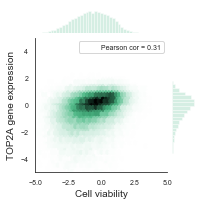

In [141]:
sns.set_palette('YlGnBu',2)
sns.set_style('white')
g=sns.jointplot(sig_info['shRNA_abundance'],signatures['TOP2A'],kind='hex',
                height=3,xlim=(-5,5),ylim=(-5,5))
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.set_xlabel('Cell viability',size=10)
g.ax_joint.set_ylabel('TOP2A gene expression',size=10)
rsquare = lambda a, b: pcor(a, b)[0]
g.annotate(rsquare,stat="Pearson cor", loc="upper right", fontsize=7)
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(),size=7)
g.ax_joint.set_yticklabels(g.ax_joint.get_yticklabels(),size=7)
plt.savefig('../figures/raw/Fig2Atop2a.pdf')

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


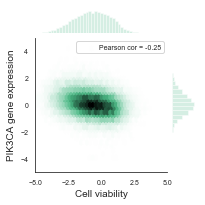

In [142]:
sns.set_palette('YlGnBu',2)
sns.set_style('white')
g=sns.jointplot(sig_info['shRNA_abundance'],signatures['PIK3CA'],kind='hex',
                height=3,xlim=(-5,5),ylim=(-5,5))
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.set_xlabel('Cell viability',size=10)
g.ax_joint.set_ylabel('PIK3CA gene expression',size=10)
rsquare = lambda a, b: pcor(a, b)[0]
g.annotate(rsquare,stat="Pearson cor", loc="upper right", fontsize=7)
g.ax_joint.set_xticklabels(g.ax_joint.get_xticklabels(),size=7)
g.ax_joint.set_yticklabels(g.ax_joint.get_yticklabels(),size=7)
plt.savefig('../figures/raw/Fig2Apik3ca.pdf')